In [15]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [16]:
app = Flask(__name__)

# bacalah file `googleplaystore.csv` data dan simpan ke objek dataframe dengan nama playstore
playstore = pd.read_csv("data/googleplaystore.csv")

# Hapus data yang duplikat berdasarkan kolom App, dengan tetap keep data pertama (hint : gunakan parameter subset)
playstore.drop_duplicates(subset= 'App', keep='first', inplace =True) 

# bagian ini untuk menghapus row 10472 karena nilai data tersebut tidak tersimpan pada kolom yang benar
playstore.drop([10472], inplace=True)

# Cek tipe data kolom Category. Jika masih tersimpan dengan format tipe data yang salah, ubah ke tipe data yang sesuai
playstore.Category = playstore['Category'].astype('category')

# Pada kolom Installs Buang tanda koma(,) dan tanda tambah(+) kemudian ubah tipe data menjadi integer
playstore.Installs = playstore.Installs.apply(lambda x: x.replace("+",""))
playstore.Installs = playstore.Installs.apply(lambda x: x.replace(",",""))
# bagian untuk mengubah tipe data Installs
playstore.Installs = playstore.Installs.astype("int64")

In [17]:
# Bagian ini untuk merapikan kolom Size, Anda tidak perlu mengubah apapun di bagian ini
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)

In [18]:
# Pada kolom Price, buang karakater $ pada nilai Price lalu ubah tipe datanya menjadi float
playstore.Price = playstore.Price.apply(lambda x: x.replace("$",""))
playstore.Price = playstore.Price.astype("float64")

# Ubah tipe data Reviews, Size, Installs ke dalam tipe data integer
playstore[["Reviews","Size","Installs"]] = playstore[["Reviews","Size","Installs"]].astype("int64")

In [19]:
df2 = playstore.copy()
top_category = pd.crosstab(index=df2['Category'], columns='jumlah').sort_values("jumlah", ascending=False).reset_index()
most_categories : top_category.iloc[0,0]
total: top_category['jumlah'][0]
rev_table : df2[["Category","App","Reviews","Rating"]].groupby(["Category","App"]).\
    agg({"Reviews":"sum",
         "Rating":"mean"}).\
        sort_values(['Reviews','Category'], ascending=False).\
      head(10)

<BarContainer object of 5 artists>

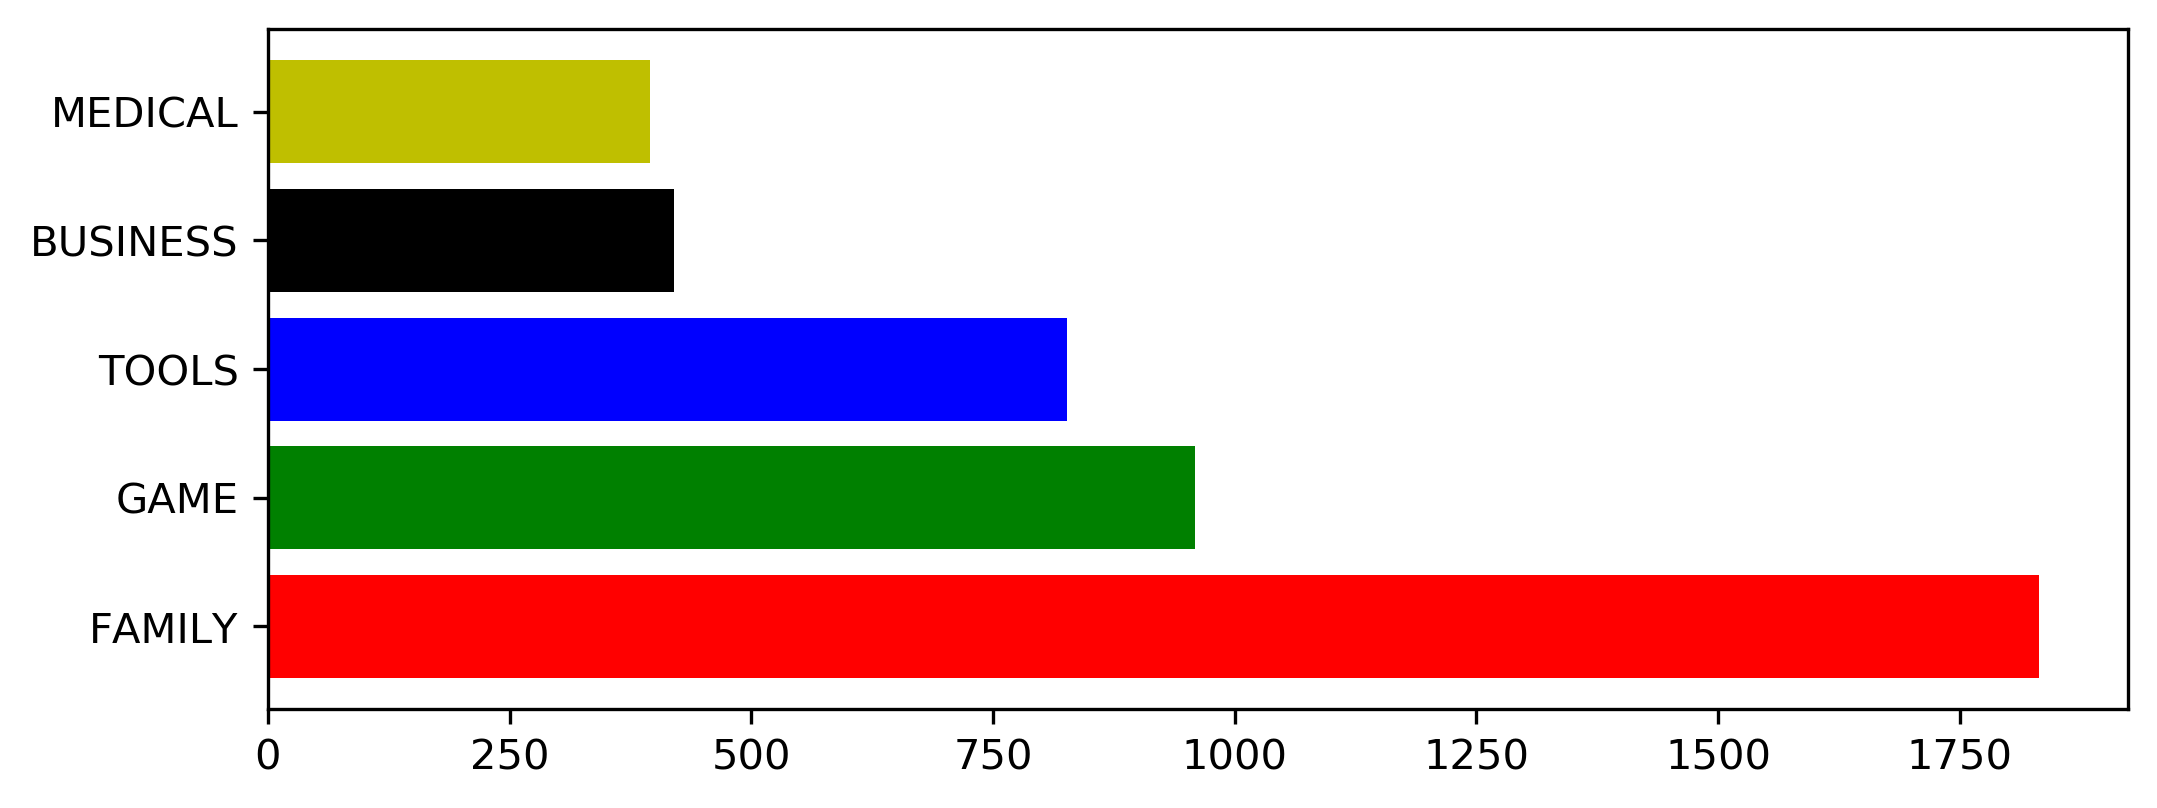

In [20]:
cat_order = df2.groupby('Category').agg({
    'App' : 'count'}).rename({'App':'Total'}, axis=1)\
    .sort_values('Total', ascending = False).head()
X = cat_order.index
Y = cat_order.Total
my_colors = 'rgbkymc'
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
plt.barh(X,Y, color=my_colors)

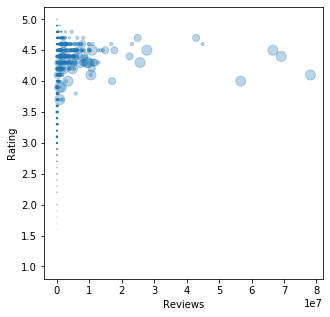

In [21]:
#97 - 105
X = df2["Reviews"].values # axis x
Y = df2["Rating"].values # axis y
area = playstore["Installs"].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
    # isi nama method untuk scatter plot, variabel x, dan variabel y
plt.scatter(x=X,y=Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

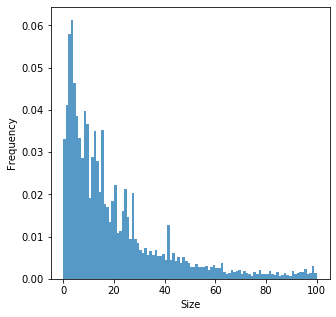

In [22]:
X=(df2['Size']/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

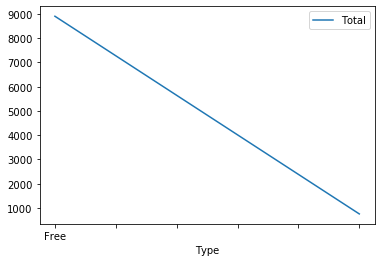

In [23]:
Type_order = df2.groupby('Type').agg({
'Type' : 'count'
}).rename({'Type':'Total'}, axis=1).sort_values(by='Total',ascending=False).head().plot.line()